# SEMI FINAL BDC

Kode Kelompok: SD20210000120

Nama Anggota Kelompok
- FAHIRA NURUL ICHZZA
- IRFAN CHAIRURRACHMAN
- NADHIFA AQILLA HUSNA

In [ ]:
# Import Module yang dibutuhkan
import urllib.request
import os 
import cv2
import sys
import shutil
import imutils

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## DOWNLOAD DATA

### Raw Data

In [ ]:
# Dowload dataset (raw image and csv) then unzip

url = "https://www.dropbox.com/s/05epthevlx8q4yb/Data.zip?dl=1"  # dl=1 is important


u = urllib.request.urlopen(url)
data = u.read()
u.close()

with open('data.zip', "wb") as f :
    f.write(data)

In [ ]:
#unzip
!unzip "/content/data.zip" -d "/content"

Archive:  /content/data.zip
replace /content/Data/submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Data/submission.csv  
  inflating: /content/Data/train.csv  
  inflating: /content/Data/Testing/2909b21f-8862-4def-96a9-adc0d37372bc.jpg  
  inflating: /content/Data/Testing/59dda362-9928-4519-98a2-1bb11f439ec7.jpg  
  inflating: /content/Data/Testing/e10b6596-133f-4057-8b40-78f022ba3053.jpg  
  inflating: /content/Data/Testing/aa14e18c-8615-49c1-b8be-4033cd56f2a1.jpg  
  inflating: /content/Data/Testing/41949b7b-7f6d-475d-905e-2ad60d7ddcde.jpg  
  inflating: /content/Data/Testing/3651301a-e506-493c-bbfc-56d5df570afe.jpg  
  inflating: /content/Data/Testing/5533a176-bea5-41cb-bcc4-938b5a104597.jpg  
  inflating: /content/Data/Testing/efbe544a-9fee-444d-a076-dbfb1c998644.jpg  
  inflating: /content/Data/Testing/9e912a52-4f5a-4ace-a117-101fb9e7c6f6.jpg  
  inflating: /content/Data/Testing/174e7c7d-6193-438e-803e-773cae1caca0.jpg  
  inflating: /content/Data/Test

### FACIAL RECOGNITION

In [ ]:
# Deteksi wajah pada data raw dan disimpan ke dalam masing-masing folder
os.mkdir('/content/Data/Cropped_Faces')
os.mkdir('/content/Data/Face_Detect')
folderPath = '/content/Data/Cropped_Faces'
folderPath_face = '/content/Data/Face_Detect'

# Folder khusus untuk gambar yang terdeteksi lebih dari 3
# 1 folder dengan wajah lebih dari 3 mengindikasikan ada orang lain di dalam gambar
# Sehingga lebih mudah dalam membersihkannya
os.mkdir('/content/Data/MorDenTri')
mordentri = '/content/Data/MorDenTri'

imagesFolder = '/content/Data/Training'

detected_face_list = []
image_file_list = []
error_file = []
filter_folder = {'folder':[], 'count':[]}

z = 0

for folder in os.listdir(imagesFolder):
  new_folder_path = os.path.join(folderPath, folder)
  os.mkdir(new_folder_path)
  imgprfldr = 0
  for images in os.listdir(os.path.join(imagesFolder, folder)):
    try:
      imagePath = os.path.join(imagesFolder, folder, images)
      image_original = cv2.imread(imagePath)
      
      image = imutils.resize(image_original, width=2160)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      # Deteksi wajah menggunakan faceCascade
      faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
      faces = faceCascade.detectMultiScale(
          gray,
          scaleFactor=1.3,
          minNeighbors=3,
          minSize=(100, 100)
      )

      imgprfldr = imgprfldr + len(faces)

      print("[INFO] Found {0} Faces.".format(len(faces)))

      # Crop gambar dengan wajah terdeteksi
      for (x, y, w, h) in faces:
          roi_color = image[y:y + h, x:x + w]
          print("[INFO] Object found. Saving locally.")
          cv2.imwrite((os.path.join(new_folder_path, images.rsplit('.', 1)[0]+ str(w) + str(h) + '_faces.jpg')), roi_color)
      z = z + 1

      result = len(faces) if len(faces) != 0 else 'NF'
      # print(result)
      detected_face_list.append(result)
      image_file_list.append(images)
      pass
    # continue the process when error occured
    except:
      # print the error path and save at error_file
      print('\n-------%s ERROR-----------\n' % imagePath)
      error_file.append(imagePath)
      image_file_list.append(images)
      detected_face_list.append('ERROR')
      continue
  
  # Faces lebih dari 3 dicatat untuk dicek secara manual
  if imgprfldr > 3:
    filter_folder['folder'].append(folder)
    filter_folder['count'].append(imgprfldr)
    new_mordentri = os.path.join(mordentri, folder)
    shutil.move(new_folder_path, new_mordentri, copy_function = shutil.copytree)
  
  status = cv2.imwrite(os.path.join('/content/Data/Face_Detect', images.rsplit('.', 1)[0] +'.jpg'), image)
  print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

### Clean Data

Hasil kode di atas dicek bersihkan secara manual untuk gambar bukan wajah serta wajah orang lain. Kemudian di upload ke dropbox menjadi CleanData

In [ ]:
# Download clean dataset and unzip to CleanData

url = "https://www.dropbox.com/s/7wr62tu6arbyzg4/CleanData.zip?dl=1"  # dl=1 is important

u = urllib.request.urlopen(url)
data = u.read()
u.close()
 
with open('cleandata.zip', "wb") as f :
    f.write(data)

In [ ]:
!unzip "/content/cleandata.zip" -d "/content/CleanData"

Archive:  /content/cleandata.zip
   creating: /content/CleanData/1/
   creating: /content/CleanData/10/
   creating: /content/CleanData/100/
   creating: /content/CleanData/101/
   creating: /content/CleanData/102/
   creating: /content/CleanData/103/
   creating: /content/CleanData/104/
   creating: /content/CleanData/105/
   creating: /content/CleanData/106/
   creating: /content/CleanData/107/
   creating: /content/CleanData/108/
   creating: /content/CleanData/109/
   creating: /content/CleanData/11/
   creating: /content/CleanData/110/
   creating: /content/CleanData/111/
   creating: /content/CleanData/112/
   creating: /content/CleanData/113/
   creating: /content/CleanData/114/
   creating: /content/CleanData/115/
   creating: /content/CleanData/116/
   creating: /content/CleanData/117/
   creating: /content/CleanData/118/
   creating: /content/CleanData/119/
   creating: /content/CleanData/12/
   creating: /content/CleanData/120/
   creating: /content/CleanData/121/
   creatin

## DATA PIPELINE

Data pipeline berfungsi agar dataset yang sudah bersih dapat digunakan untuk proses pelatihan model

In [ ]:
# Read train.csv yang berisi informasi jenis kelamin dan usia setiap folder
df = pd.read_csv("/content/Data/train.csv")
print(df.shape)
df.head()

(770, 3)


,nomor,jenis kelamin,usia
0,1,0,27
1,2,1,24
2,3,0,29
3,4,1,23
4,5,0,20


In [ ]:
# Cek apakah ada nilai "NULL" dalam dataset
df.isnull().sum()

nomor            0
jenis kelamin    0
usia             0
dtype: int64

### Feature Visualization

Visualisasi feature (jenis kelamin dan usia) menggunakan seaborn

In [ ]:
columns = ['jenis_kelamin','usia']
y = df.drop('nomor', axis = 1)

In [ ]:
y.head()

,jenis kelamin,usia
0,0,27
1,1,24
2,0,29
3,1,23
4,0,20


In [ ]:
y.nunique()

jenis kelamin     2
usia             38
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


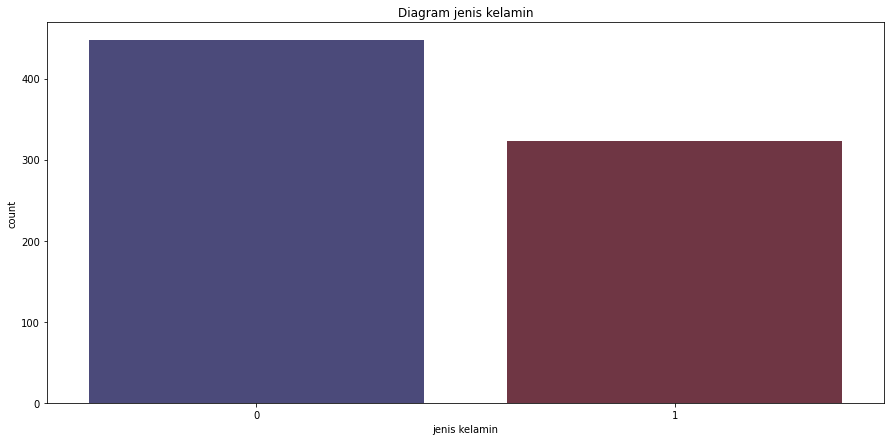

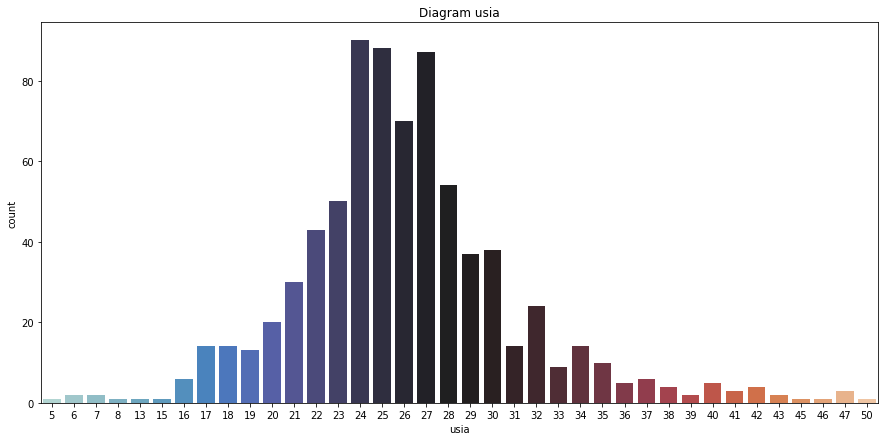

In [ ]:
# Visualisasi Jenis kelamin dan Usia
for i in y.columns :
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette='icefire')
    plt.title('Diagram {}'.format(i))

### Mapping Folder

`Mapping Folder` berfungsi untuk menghubungkan informasi yang berada pada file `train.csv` dengan lokasi folder gambar pada folder `Training`

In [ ]:
# Kode ini untuk mengecek apakah nomor folder di csv ada di folder data image atau tidak
# Jika tidak ada, raise error dan menyimpan ke path_folder sebagai NaN (None)

path = '/content/CleanData'
path_folder = [] # Menyimpan path folder ke dalam list

# Iterasi tiap baris pada train.csv
for i in range(df.shape[0]):
  try:
    folder = os.path.join(path, str(df.nomor[i]))
    isfolder = os.path.isdir(folder)
    # Jika id folder teridentifikasi, maka masukkan dalam list path_folder
    if isfolder == True:
      path_folder.append(folder)
      continue
    path_folder.append(np.nan)
    pass
  # Error handling ketika proses dalam blok try gagal
  except OSError as e:
    path_folder.append(np.nan)
    print('%s ERROR: %s' % (df.nomor[i], e))
    continue
  except Exception:
    raise

In [ ]:
df['path_folder'] = path_folder

df[df['path_folder'].notnull()]

,nomor,jenis kelamin,usia,path_folder
0,1,0,27,/content/CleanData/1
1,2,1,24,/content/CleanData/2
2,3,0,29,/content/CleanData/3
3,4,1,23,/content/CleanData/4
4,5,0,20,/content/CleanData/5
...,...,...,...,...
765,766,0,21,/content/CleanData/766
766,767,0,25,/content/CleanData/767
767,768,0,21,/content/CleanData/768
768,769,0,23,/content/CleanData/769


In [ ]:
df.head(10)

,nomor,jenis kelamin,usia,path_folder
0,1,0,27,/content/CleanData/1
1,2,1,24,/content/CleanData/2
2,3,0,29,/content/CleanData/3
3,4,1,23,/content/CleanData/4
4,5,0,20,/content/CleanData/5
5,6,1,28,/content/CleanData/6
6,7,0,23,/content/CleanData/7
7,8,0,25,/content/CleanData/8
8,9,0,20,/content/CleanData/9
9,10,1,24,/content/CleanData/10


In [ ]:
# Menampilkan jumlah data NONE pada train.csv
df.isnull().sum()

nomor            0
jenis kelamin    0
usia             0
path_folder      0
dtype: int64

In [ ]:
# DROP NILAI NONE
df = df.dropna()

In [ ]:
df.shape

(770, 4)

In [ ]:
df = df.reset_index(drop=True)

### Mapping Images

Berhubung di dalam 1 folder terdapat beberapa wajah, sehingga `Mapping Images` berfungsi agar setiap gambar wajah memiliki informasi jenis kelamin dan usia dan direpresentasikan ke dalam setiap baris dataframe

In [ ]:
# kode ini untuk menyiapkan dataframe baru sesuai banyak jumlah gambar
# Jadi data row di csv bakal tercopy
nomor, jenis_kelamin, usia, image_path = [], [], [], []

# Iterasi setiap folder
for i in range(df.shape[0]):
  # Iterasi setiap gambar di dalam folder
  for image in os.listdir(df.path_folder[i]):
    try:
      nomor.append(df.nomor[i])
      jenis_kelamin.append(df['jenis kelamin'][i])
      usia.append(df.usia[i])

      imagePath = os.path.join(df.path_folder[i], image)
      # Open and verify image
      img = Image.open(imagePath)
      img.verify()
      # If valid, append to image_path
      image_path.append(imagePath)
      print(imagePath + ' Image Verified')
    except (IOError, SyntaxError) as e:
      # If error occured, append NaN to image_path
      image_path.append(np.nan)
      print('Bad file:', image)
    except Exception:
      raise

/content/CleanData/1/1_110491049_faces.jpg Image Verified
/content/CleanData/1/1_3376376_faces.jpg Image Verified
/content/CleanData/1/1_2531531_faces.jpg Image Verified
/content/CleanData/2/2_1276276_faces.jpg Image Verified
/content/CleanData/2/2_2477477_faces.jpg Image Verified
/content/CleanData/2/2_3824824_faces.jpg Image Verified
/content/CleanData/3/3_2292292_faces.jpg Image Verified
/content/CleanData/3/3_110331033_faces.jpg Image Verified
/content/CleanData/3/3_3703703_faces.jpg Image Verified
/content/CleanData/4/4_2732732_faces.jpg Image Verified
/content/CleanData/4/4_3389389_faces.jpg Image Verified
/content/CleanData/4/4_1384384_faces.jpg Image Verified
/content/CleanData/5/5_3421421_faces.jpg Image Verified
/content/CleanData/5/5_2322322_faces.jpg Image Verified
/content/CleanData/5/5_1308308_faces.jpg Image Verified
/content/CleanData/6/6_2733733_faces.jpg Image Verified
/content/CleanData/6/6_3296296_faces.jpg Image Verified
/content/CleanData/6/6_1420420_faces.jpg Ima

In [ ]:
# Dataframe berdasarkan jumlah image, 990 folder memiliki 2143 wajah yang terdeteksi
# (karena jumlah gambar perfolder > 1)
data = pd.DataFrame({'nomor':nomor,
                     'jenis_kelamin':jenis_kelamin,
                     'usia':usia,
                     'image_path':image_path})

data.head(10)

,nomor,jenis_kelamin,usia,image_path
0,1,0,27,/content/CleanData/1/1_110491049_faces.jpg
1,1,0,27,/content/CleanData/1/1_3376376_faces.jpg
2,1,0,27,/content/CleanData/1/1_2531531_faces.jpg
3,2,1,24,/content/CleanData/2/2_1276276_faces.jpg
4,2,1,24,/content/CleanData/2/2_2477477_faces.jpg
5,2,1,24,/content/CleanData/2/2_3824824_faces.jpg
6,3,0,29,/content/CleanData/3/3_2292292_faces.jpg
7,3,0,29,/content/CleanData/3/3_110331033_faces.jpg
8,3,0,29,/content/CleanData/3/3_3703703_faces.jpg
9,4,1,23,/content/CleanData/4/4_2732732_faces.jpg


In [ ]:
data.shape

(2143, 4)

In [ ]:
data.isnull().sum()

nomor            0
jenis_kelamin    0
usia             0
image_path       0
dtype: int64

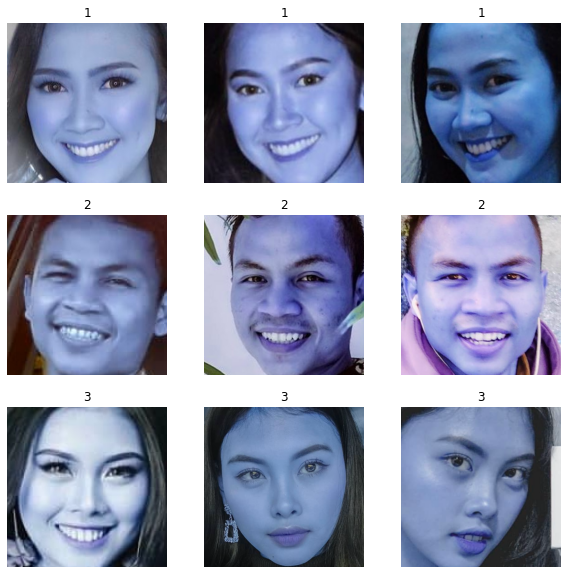

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(data.shape[0])[:9]:
    ax = plt.subplot(3, 3, i + 1)
    image = cv2.imread(data.image_path[i])
    plt.imshow(image)
    plt.title(data.nomor[i])
    plt.axis("off")

### Split Data

Pada `Split Data` terdapat proses pemisahan data label (usia) beserta feature (gambar wajah) serta pemisahan data training dan validasi dengan rasio 80:20

In [ ]:
# Membersihkan data NONE
clean_data = data.dropna()

clean_data = clean_data.reset_index(drop=True)

clean_data.shape

(2143, 4)

In [ ]:
clean_data.isnull().sum()

nomor            0
jenis_kelamin    0
usia             0
image_path       0
dtype: int64

In [ ]:
# Pembagian feature dan label
X = clean_data[['image_path']]
y = clean_data[['usia']]

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,image_path
905,/content/CleanData/305/305_1277277_faces.jpg
1699,/content/CleanData/601/601_114641464_faces.jpg
2101,/content/CleanData/754/754_1272272_faces.jpg
305,/content/CleanData/105/105_3458458_faces.jpg
986,/content/CleanData/337/337_3398398_faces.jpg
...,...
1638,/content/CleanData/578/578_1346346_faces.jpg
1095,/content/CleanData/378/378_2299299_faces.jpg
1130,/content/CleanData/392/392_3425425_faces.jpg
1294,/content/CleanData/449/449_1634634_faces.jpg


In [ ]:
y_train

,usia
905,22
1699,32
2101,27
305,27
986,28
...,...
1638,26
1095,22
1130,35
1294,25


In [ ]:
# Menampilkan jumlah data training dan testing
print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (1714, 1)
Test data shape (429, 1)


### Convert to Array

Informasi pada gambar harus diubah ke dalam bentuk array agar dapat dikelola baik oleh model deep learning

In [ ]:
# Ubah data images ke bentuk np.array sehingga informasi piksel dapat dikelola model
train_images = []
test_images = []

# Gambar ke dalam bentuk array (training)
for row in X_train.iterrows():
    image = Image.open(row[1].image_path)
    image = ImageOps.grayscale(image) # convert to grayscale
    image = image.resize((150, 150))   # Resize the image
    data = np.asarray(image) # Image to np array
    train_images.append(data)

# Gambar ke dalam bentuk array (testing)
for row in X_test.iterrows():
    image = Image.open(row[1].image_path)
    image = ImageOps.grayscale(image) # convert to grayscale
    image = image.resize((150, 150))  # Resize the image
    data = np.asarray(image) # Image to np array
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (1714, 150, 150)
Test images shape (429, 150, 150)


In [ ]:
# expand_dims agar data menjadi 4 dimensi
# sehingga dapat diolah oleh ImageDataGenerator
train_images = np.expand_dims(train_images, axis=3)
train_images.shape

(1714, 150, 150, 1)

In [ ]:
test_images = np.expand_dims(test_images, axis=3)
test_images.shape

(429, 150, 150, 1)

### Augmentation

Augmentasi berguna untuk menambah variasi dataset tanpa harus menambah jumlah dataset

In [ ]:
BACTH_SIZE = 32
TRAIN_BATCH = len(X_train)
TEST_BATCH = len(X_test)

# Augmentasi untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255, # Rescale pixel
    rotation_range=5,  # randomly rotate images in the range 5 degrees
    horizontal_flip=True,  # flip images horizontally
    zoom_range = 0.1, # Randomly zoom image 10%
    width_shift_range=0.1,  # randomly shift images horizontally 10%
    height_shift_range=0.1, # randomly shift images vertically 10%
    brightness_range=[0.2,1.5], # randomly darkening and brightening the image
    fill_mode='nearest')

# Augmentasi untuk data testing
test_datagen = ImageDataGenerator(
    rescale=1./255) # Rescale pixel

train_generator = train_datagen.flow(x=train_images, y=y_train)

test_generator = test_datagen.flow(x=test_images, y=y_test)

## MODEL

### MobileNetV2


Arsitektur MobileNetV2 sangat mirip dengan MobileNet original, hanya saja MobileNetV2 menggunakan fitur *inverted residual blocks* dengan *bottlenecking*. Arsitektur ini memiliki jumlah parameter yang jauh lebih rendah daripada MobileNet original. MobileNetV2 mendukung input size yang lebih dari 32x32. Dalam hal ini kami menggunakan input sebesar 150x150.

Referensi: [MobileNetV2: Inverted Residuals and Linear Bottlenecks](https://keras.io/api/applications/mobilenet/#mobilenetv2-function) (CVPR 2018)



In [ ]:
# Import module yang dibutuhkan
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# Inisiasi arsitektur MobileNetV2 dengan weights=None,
# sehingga tidak memiliki bobot yang berasal dari proses training menggunakan dataset lain
model_mobilenetv2 = MobileNetV2(input_shape = (150, 150, 1),
                    include_top = False,
                    weights = None) # weights=None agar tidak memiliki bobot yang berasal dari dataset lain

In [ ]:
# Menampilkan arsitektur MobileNetV2 secara keseluruhan
model_mobilenetv2.summary()

Model: "mobilenetv2_1.00_150"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   288         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
# Freeze semua layer pada mobilenetv2 
for layer in model_mobilenetv2.layers:
  layer.trainable = False

# Inisiasi penggunaan layer hingga 'block_1_project_BN' (tidak semua lyer digunakan)
last_layer = model_mobilenetv2.get_layer('block_1_project_BN')
last_output = last_layer.output
# Flatten the output layer ke dalam bentuk 1 dimensi
x = layers.Flatten()(last_output)
# Menambahkan sebuah fully connected layer dengan total 1,024 hidden unit dengan aktivasi ReLU
x = layers.Dense(1024, activation='relu')(x)
# Menambahkan dropout sebesar 20%
x = layers.Dropout(0.2)(x)
# Layer output dengan Neuron Dense
x = layers.Dense(units=1)(x)

In [ ]:
#  Inisiasi modelMobileNet kemudian menampilkan arsitekturnya
modelMobileNet = Model(model_mobilenetv2.input, x)
modelMobileNet.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 75, 75, 32)        288       
_________________________________________________________________
bn_Conv1 (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
Conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
expanded_conv_depthwise (Dep (None, 75, 75, 32)        288       
_________________________________________________________________
expanded_conv_depthwise_BN ( (None, 75, 75, 32)        128       
_________________________________________________________________
expanded_conv_depthwise_relu (None, 75, 75, 32)        0   

In [ ]:
# Compile model dengan optimizer Adam dan loss mse
modelMobileNet.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
# Menjalankan training dengan jumlah epoch sebanyak 300
history = modelMobileNet.fit(train_generator, 
                    batch_size=32, epochs=300, 
                    validation_data=test_generator) 

# Menyimpan model ke dalam bentuk .h5
modelMobileNet.save('usia_model_mobileNetv2.h5')

Epoch 1/300
54/54 [==============================] - 6s 98ms/step - loss: 317.5063 - val_loss: 52.5886
Epoch 2/300
54/54 [==============================] - 5s 93ms/step - loss: 125.8510 - val_loss: 47.5397
Epoch 3/300
54/54 [==============================] - 5s 93ms/step - loss: 114.1420 - val_loss: 43.8657
Epoch 4/300
54/54 [==============================] - 5s 93ms/step - loss: 102.6889 - val_loss: 40.3203
Epoch 5/300
54/54 [==============================] - 5s 93ms/step - loss: 83.8202 - val_loss: 37.0755
Epoch 6/300
54/54 [==============================] - 5s 94ms/step - loss: 65.4873 - val_loss: 33.7869
Epoch 7/300
54/54 [==============================] - 5s 95ms/step - loss: 54.0656 - val_loss: 31.3273
Epoch 8/300
54/54 [==============================] - 5s 93ms/step - loss: 38.9237 - val_loss: 29.8544
Epoch 9/300
54/54 [==============================] - 5s 93ms/step - loss: 32.0911 - val_loss: 28.6933
Epoch 10/300
54/54 [==============================] - 5s 93ms/step - loss: 29.

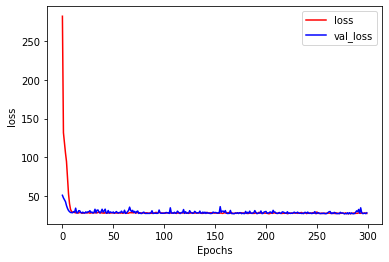

In [ ]:
# Plot hasil pelatihan model
def plot_graphs(history, string):
  epochs = range(len(history.history[string]))
  plt.plot(epochs, history.history[string], 'r', label=string)
  plt.plot(epochs, history.history['val_'+string], 'b', label=string+'_val')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "loss")

In [ ]:
# Menampilkan persebaran prediksi umur pada data testing
test_generator2 = test_datagen.flow(x=test_images)

# Prediksi gambar pada data testing oleh model
classes = modelMobileNet.predict(test_generator2)

y_test2 = y_test.reset_index(drop=True)

y_test2['predict'] = classes

# Perbandingan usia dengan hasil prediksi
y_test2

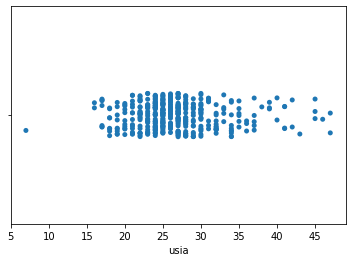

In [ ]:
# Persebaran data testing
ax = sns.stripplot(x=y_test2['usia'])

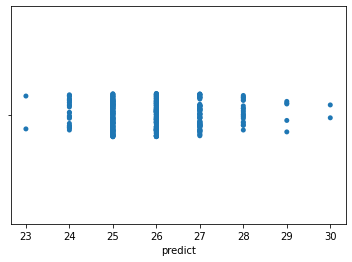

In [ ]:
# Persebaran usia prediksi model
ax = sns.stripplot(x=y_test2['predict'].round())

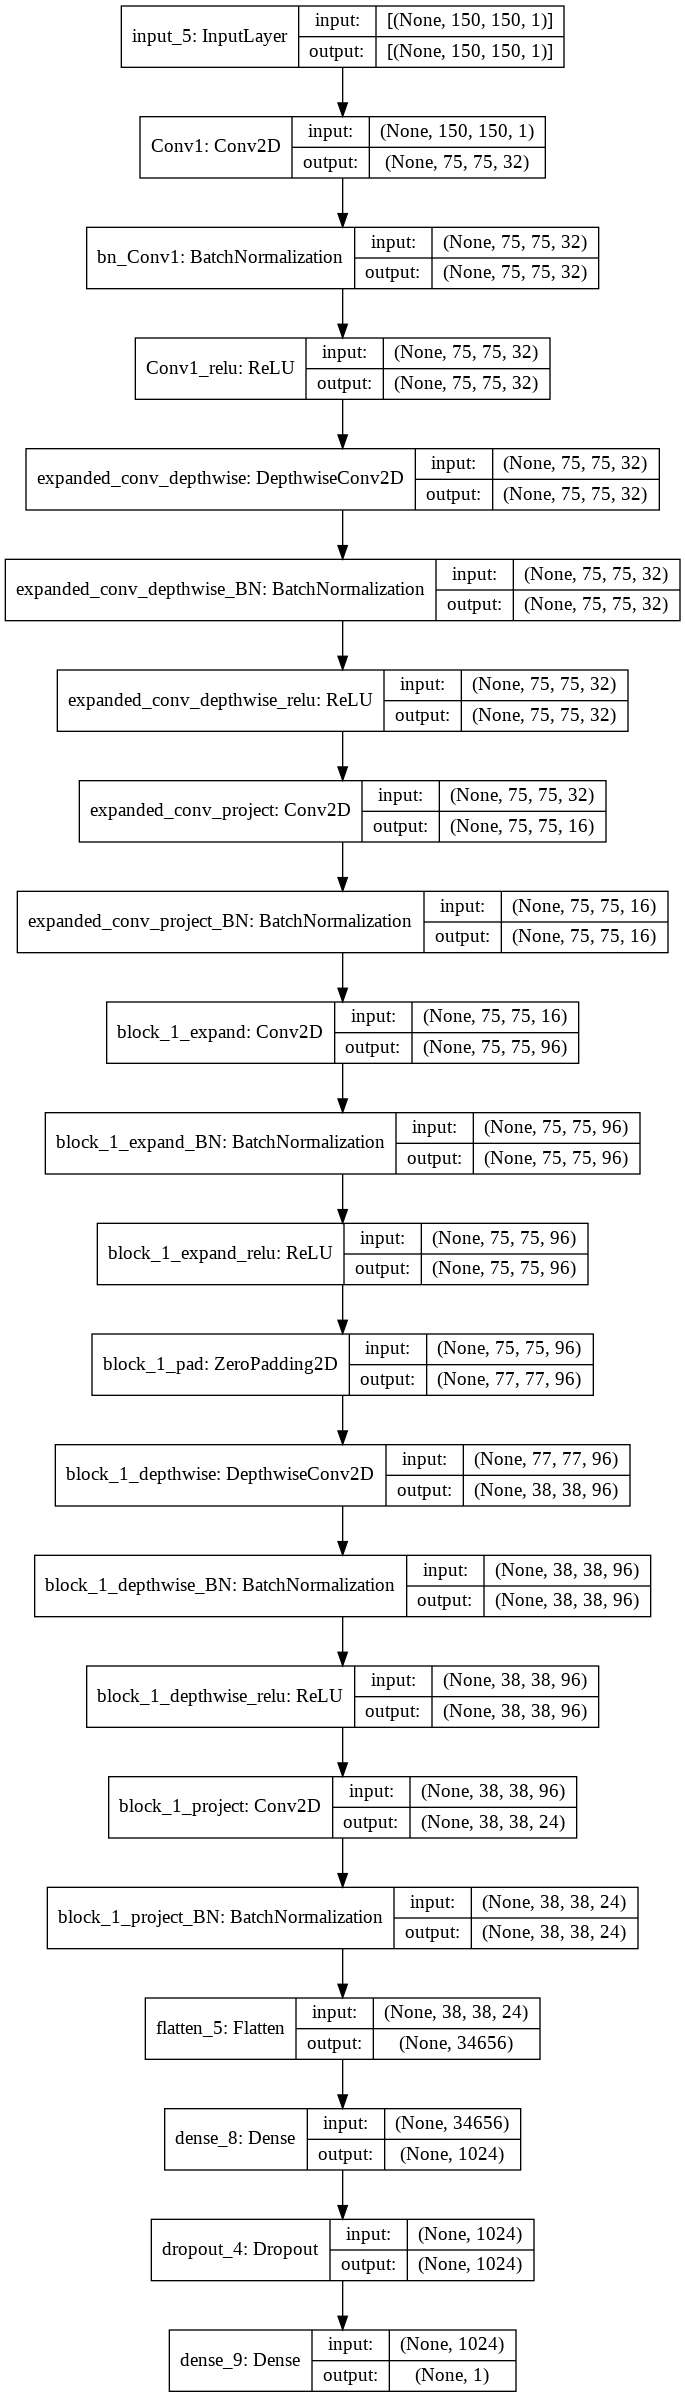

In [ ]:
# Export bentuk arsitektur dalam bentuk gambar
tf.keras.utils.plot_model(
    modelMobileNet, to_file='modelMobileNet.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

In [ ]:
!pip install visualkeras

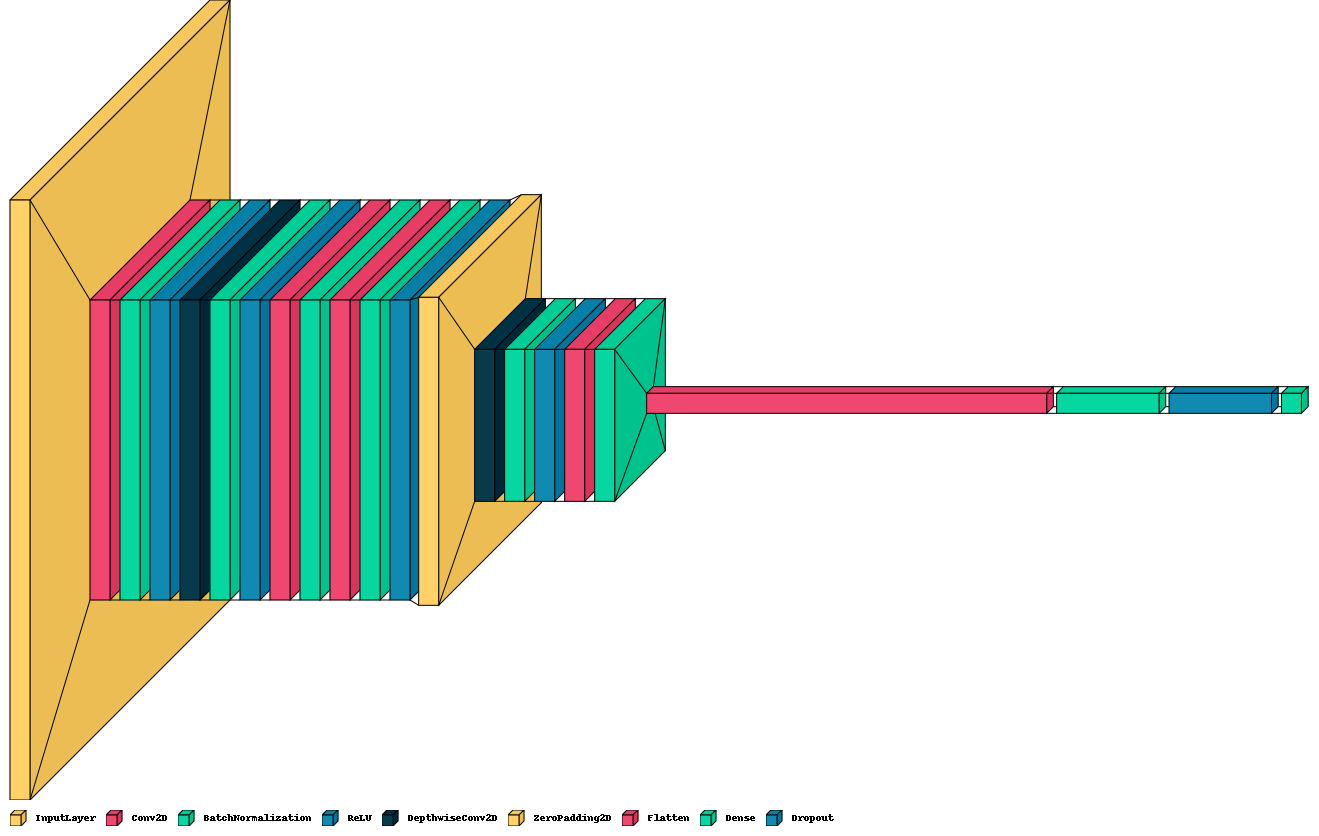

In [ ]:
# Export bentuk arsitektur dalam bentuk lebih visual
import visualkeras
visualkeras.layered_view(modelMobileNet, legend=True)

## SUBMISSION

In [ ]:
# Mount drive ke collab untuk load model yang telah kita latih
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model

usia_model = load_model("/content/drive/MyDrive/Lomba/sm/AAAA_Model BDC/usia_model_mobileNetv2300.h5")

test_datagen = ImageDataGenerator(
    rescale=1./255)

In [ ]:
submission = pd.read_csv("/content/Data/submission.csv")
print(submission.shape)
submission.head()

(990, 1)


,id
0,005093b2-8c4b-4ed7-91c3-f5f4d50f8d27
1,0052554e-069e-4c43-beb0-0885e8f7684e
2,0092b954-1143-4a95-a17b-1edfa6af3b01
3,009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16
4,00d0e306-06fe-45d8-ae6c-6f83ab8f7810


In [ ]:
!pip install face_recognition

In [ ]:
# Face detection menggunakan face recognition
from imutils import face_utils
import random
from PIL import Image
import face_recognition

testing_path = '/content/Data/Testing'

X = submission[['id']]

# Ubah data images ke bentuk np.array sehingga udah siap untuk training
usia = []
error_file = []
count = 0

# Iterasi setiap data submisi
for row in X.iterrows():
  try:
    print(count, end='. ')

    imagePath = os.path.join(testing_path, row[1].id+'.jpg')
    image = face_recognition.load_image_file(imagePath)
    print(imagePath)

    # Ubah gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Memprediksi wajah yang ada dalam foto
    face_locations = face_recognition.face_locations(gray, number_of_times_to_upsample=0, model="cnn")

    jml = len(face_locations)

    # Crop satu wajah dalam foto
    if jml > 0:
      top, right, bottom, left = face_locations[random.randint(0,jml-1)]
      roi_color = gray[top:bottom, left:right]

    img = cv2.resize(roi_color, (150, 150))   # Resize the image to 150x150

    print("[INFO] Found {0} Faces.".format(jml))
    
    # Ubah gambar ke dalam bentuk array
    data = np.asarray(img)
    data = np.expand_dims(data, axis=0)
    data = np.expand_dims(data, axis=3)
    # rescale
    test_generator = test_datagen.flow(x=data)
    # Predict model
    classes = usia_model.predict(test_generator)
    kelas = int(np.round(classes[0][0]))
    print("[PREDICT] Usia: {0} ".format(kelas))
    # Append to list
    usia.append(kelas)

    count = count + 1

    pass

  except:
    print('\n-------%s ERROR-----------\n' % imagePath)
    error_file.append(row[1].id)
    usia.append(random.randint(16,37))
    count = count + 1

    continue

submission['usia'] = usia
submission

0. /content/Data/Testing/005093b2-8c4b-4ed7-91c3-f5f4d50f8d27.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 24 
1. /content/Data/Testing/0052554e-069e-4c43-beb0-0885e8f7684e.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 28 
2. /content/Data/Testing/0092b954-1143-4a95-a17b-1edfa6af3b01.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 28 
3. /content/Data/Testing/009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 25 
4. /content/Data/Testing/00d0e306-06fe-45d8-ae6c-6f83ab8f7810.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 27 
5. /content/Data/Testing/00f7b619-513e-4e43-bc32-ec49d233e09e.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 26 
6. /content/Data/Testing/00fe5537-1e84-46b3-ab06-c19d8c914794.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 27 
7. /content/Data/Testing/0111e4e4-ffbb-427b-b99f-e6162f155051.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 28 
8. /content/Data/Testing/01122df2-dc9f-4b37-a42c-5b79318a6773.jpg
[INFO] Found 1 Faces.
[PREDICT] Usia: 26 
9. /content/Data/Testing/019

,id,usia
0,005093b2-8c4b-4ed7-91c3-f5f4d50f8d27,24
1,0052554e-069e-4c43-beb0-0885e8f7684e,28
2,0092b954-1143-4a95-a17b-1edfa6af3b01,28
3,009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16,25
4,00d0e306-06fe-45d8-ae6c-6f83ab8f7810,27
...,...,...
985,feb9e70f-4182-4500-866d-9b95657e727c,24
986,fed67ed2-620a-4ebf-b61e-16ef3d9b93f7,26
987,ff14c77e-c3c2-46db-9341-30de4130ef8a,26
988,ff662f3f-8c76-4d27-a73e-c43c4353f798,24


In [ ]:
submission['usia'].dtype

dtype('int64')

In [ ]:
submission.to_csv('/content/drive/MyDrive/Lomba/sm/submission.csv', index=False)